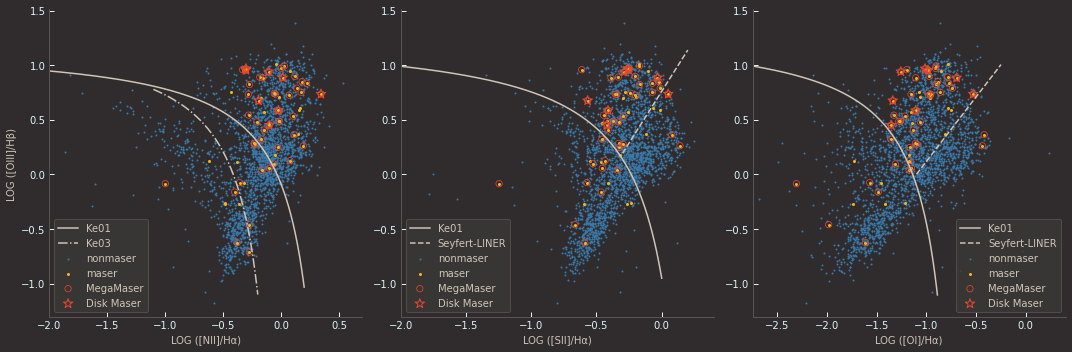

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

all_path = "./data/masers_and_nonmasers_in_MPA.csv"
all_df = pd.read_csv(all_path)


def set_up_style(ax):
    fig = ax.figure
    fig.patch.set_facecolor('#302c2e')  # Set background color to blackish

    ax.set_facecolor('#302c2e')  # Set background color to blackish
    for pos in ['bottom', 'top', 'left', 'right']:
        ax.spines[pos].set_color('#5a5353')  # Set color for plot spines (borders)

    ax.tick_params(axis='x', colors='#dff6f5')  # Set x-axis tick color to whiteish
    ax.tick_params(axis='y', colors='#dff6f5')  # Set y-axis tick color to whiteish

    ax.xaxis.label.set_color('#cfc6b8')  # Set color for x-axis label text
    ax.yaxis.label.set_color('#cfc6b8')  # Set color for y-axis label text

    ax.tick_params(axis='both', which='both', length=5, width=1, direction='in')  # Customize tick marks

    ax.spines['bottom'].set_linewidth(1)  # Set bottom spine thickness
    ax.spines['left'].set_linewidth(1)  # Set left spine thickness
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine

    legend = ax.legend(facecolor='#3b3838', edgecolor='#5a5353')  # Customize legend background and border color
    for text in legend.get_texts():
        text.set_color('#cfc6b8')  # Set legend text color

    legend.get_frame().set_facecolor('#3b3838')  # Set legend background color
    legend.get_frame().set_edgecolor('#5a5353')  # Set legend border color



# Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Extract data columns as NumPy arrays
x_columns = ["N2Ha", "S2Ha", "O1Ha"]
x_col_labels = ["LOG ([NII]/Hα)","LOG ([SII]/Hα)","LOG ([OI]/Hα)"]
y_data = all_df["O3Hb"].values
is_maser = all_df["is_maser"].values
maser_lum = all_df["maser_lum"].values
maser_morphology = all_df["maser_morphology"].values

# Create a scatter plot with a star shape marker
star_marker = plt.Line2D([0.5, 1, 1.5, 0.75, 1.25, 0.5, 1, 1.5, 0.75, 1.25],
                         [1, 0.75, 1, 0.5, 0.5, 0.25, 0.25, 0.5, 0.75, 0.75],
                         color='red', marker='*', linestyle='', markersize=10)

# Plotting the data
for i, ax in enumerate(axes):
    x_data = all_df[x_columns[i]].values

    # Mask for maser and non-maser points
    maser_mask = is_maser == 1
    non_maser_mask = is_maser == 0
    megamaser_mask = maser_lum >= 10
    disk_mask = maser_morphology >= 3


    
    # Plotting non-maser points
    ax.scatter(x_data[non_maser_mask], y_data[non_maser_mask], color="#3978a8",s=1,label ="nonmaser")

    # Plotting maser points
    ax.scatter(x_data[maser_mask], y_data[maser_mask], color="#f4b41b",s=4,label="maser")
    # Overplot megamasers
    ax.scatter(x_data[megamaser_mask], y_data[megamaser_mask], color="#e6482e",s=40,marker='o',label="MegaMaser",facecolors='none',linewidths=.75)
    # Overplot disks
    ax.scatter(x_data[disk_mask], y_data[disk_mask], color="#e6482e",s=100,marker="*",label="Disk Maser",facecolors='none')

    if i == 0:
        xvals=np.linspace(-3.5,0.2,1000)
        yvals=(0.6/(xvals-0.47))+1.19
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")

        xvals=np.linspace(-1.1,-.2,1000)
        yvals=(0.6/(xvals-0.05))+1.3
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke03",linestyle='-.')
        ax.set_xlabel(x_columns[i])

        ax.set_xlim(-2, 0.7)  # Set the desired x-range
        ax.set_ylabel("LOG ([OIII]/Hβ)",color='#cfc6b8')

    if i == 1:
        xvals=np.linspace(-3.5,0.0,1000)
        yvals=(0.72/(xvals-0.32))+1.30
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")
        xvals=np.linspace(-.30,0.2,1000)
        yvals=(1.89*xvals)+0.76
        ax.plot(xvals,yvals,color="#cfc6b8",label="Seyfert-LINER", linestyle='--')
        ax.set_xlim(-2, 0.4)  # Set the desired x-range

    
    if i == 2:

        #0.73/[log([O I]/Hα) + 0.59] + 1.33 < log([O III]/Hβ)

        xvals=np.linspace(-3.5,-.89,1000)
        yvals=(0.73/(xvals+0.59))+1.33
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")
        xvals=np.linspace(-1.1,-.25,1000)
        yvals=(1.18*xvals)+1.3
        ax.plot(xvals,yvals,color="#cfc6b8",label="Seyfert-LINER", linestyle='--')
        ax.set_xlim(-2.75, 0.4)  # Set the desired x-range

    ax.set_xlabel(x_col_labels[i],color='#cfc6b8')
    legend = ax.legend()
    set_up_style(ax)


plt.tight_layout()
plt.show()



HII nonmasers:  35.2% +/- 1.4%
Seyfert nonmasers:  20.3% +/- 1.0%
LINER nonmasers:  4.8% +/- 0.5%
Ambiguous nonmasers:  39.7% +/- 1.5%
----------------------------
HII masers:  17.7% +/- 5.8%
Seyfert masers:  46.8% +/- 10.5%
LINER masers:  0.0% +/- 0.0%
Ambiguous masers:  35.5% +/- 8.8%
----------------------------
HII megamasers:  13.3% +/- 5.8%
Seyfert megamasers:  48.9% +/- 12.7%
LINER megamasers:  0.0% +/- 0.0%
Ambiguous megamasers:  37.8% +/- 10.8%
----------------------------
HII disk_masers:  0.0% +/- 0.0%
Seyfert disk_masers:  87.5% +/- 45.3%
LINER disk_masers:  0.0% +/- 0.0%
Ambiguous disk_masers:  12.5% +/- 13.3%
----------------------------


<ipython-input-39-55eb130a60d7>:204: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


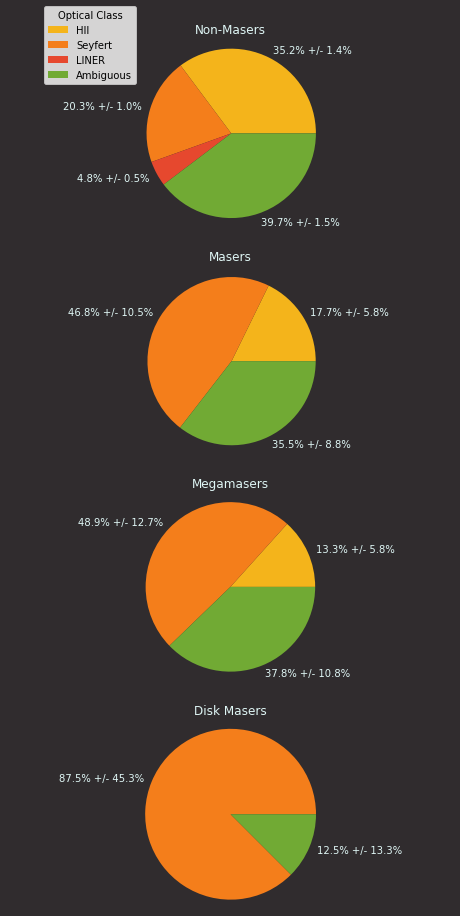

In [39]:

# Function to determine the new column value based on the values of "N2Ha", "S2Ha", and "O1Ha".
def determine_classify1(row):
    if row["O3Hb"] < 0.61/(row["N2Ha"] - 0.05) + 1.3:
        return "HII"
    elif (0.61/(row["N2Ha"] - 0.05) + 1.3 < row["O3Hb"]) and (0.61/(row["N2Ha"] -  0.47) + 1.19 > row["O3Hb"]):
        return "Composite"
    else:
        return "AGN"

# Add the new column to the DataFrame and populate it based on the conditions in the function.
all_df["Classify1"] = all_df.apply(determine_classify1, axis=1)


# Function to determine the new column value based on the values of "N2Ha", "S2Ha", and "O1Ha".
def determine_classify2(row):
    
    if row["O3Hb"] < 0.72/(row["S2Ha"] - 0.32) + 1.30:
        return "HII"    
    elif ( 0.72/(row["S2Ha"] - 0.32) + 1.30 < row["O3Hb"]) and (1.89 * row["S2Ha"] + 0.76 < row["O3Hb"]):
        return "Seyfert"
    elif ( 0.72/(row["S2Ha"] - 0.32) + 1.30 < row["O3Hb"]) and (1.89 * row["S2Ha"] + 0.76 > row["O3Hb"]):
        return "LINER"

all_df["Classify2"] = all_df.apply(determine_classify2, axis=1)

def determine_classify3(row):
    
    #log([O III]/Hβ) < 0.73/[log([O I]/Hα) + 0.59] + 1.33
    if row["O3Hb"] < 0.73/(row["O1Ha"] + 0.59) + 1.33:
        return "HII"
    elif ( ( 0.73/(row["O1Ha"] + 0.59) + 1.33 < row["O3Hb"] )  or ( row["O1Ha"] > -0.59 )) and (1.18 * row["O1Ha"] + 1.30 < row["O3Hb"]):
        return "Seyfert"
    elif ( ( 0.73/(row["O1Ha"] + 0.59) + 1.33 < row["O3Hb"] )  or ( row["O1Ha"] > -0.59 )) and (1.18 * row["O1Ha"] + 1.30 > row["O3Hb"]):
        return "LINER"

all_df["Classify3"] = all_df.apply(determine_classify3, axis=1)

def determine_optical_class(row):
    
    #log([O III]/Hβ) < 0.73/[log([O I]/Hα) + 0.59] + 1.33
    if (row["Classify1"] != "AGN") and row["Classify2"] == "HII" and row["Classify3"] == "HII":
        return "HII"
    elif row["Classify1"] == "AGN" and row["Classify2"] == "Seyfert" and row["Classify3"] == "Seyfert":
        return "Seyfert"
    elif row["Classify1"] == "AGN" and row["Classify2"] == "LINER" and row["Classify3"] == "LINER":
        return "LINER"
    else:
        return "Ambiguous"
    
all_df["Optical_class"] = all_df.apply(determine_optical_class, axis=1)

# # Calculate the percentage of masers
# total_points = len(is_maser)
# maser_points = np.sum(is_maser == 1)
# percentage_masers = (maser_points / total_points) * 100

# print(f"Percentage of masers: {percentage_masers:.2f}%")

import math
def div_error(x,y):
    return (x/y) * (math.sqrt((1/x)+(1/y)))

def div_str(x,y):
    return (str(round(round(x/y,3)*100,1))+"% +/- "+str(round(round(div_error(x,y),3)*100,1))+"%")

masers = all_df[all_df["is_maser"].values == 1]
nonmasers = all_df[all_df["is_maser"].values == 0]
megamasers = masers[masers["maser_lum"].values >=  10]
disk_masers = masers[masers["maser_morphology"].values >= 3]

non_masers_sf = nonmasers[nonmasers["Optical_class"].values == "HII"]
non_masers_seyfert = nonmasers[nonmasers["Optical_class"].values == "Seyfert"]
non_masers_LINER = nonmasers[nonmasers["Optical_class"].values == "LINER"]
non_masers_amb = nonmasers[nonmasers["Optical_class"].values == "Ambiguous"]

masers_sf = masers[masers["Optical_class"].values == "HII"]
masers_seyfert = masers[masers["Optical_class"].values == "Seyfert"]
masers_LINER = masers[masers["Optical_class"].values == "LINER"]
masers_amb = masers[masers["Optical_class"].values == "Ambiguous"]

megamasers_sf = megamasers[megamasers["Optical_class"].values == "HII"]
megamasers_seyfert = megamasers[megamasers["Optical_class"].values == "Seyfert"]
megamasers_LINER = megamasers[megamasers["Optical_class"].values == "LINER"]
megamasers_amb = megamasers[megamasers["Optical_class"].values == "Ambiguous"]

disk_masers_sf = disk_masers[disk_masers["Optical_class"].values == "HII"]
disk_masers_seyfert = disk_masers[disk_masers["Optical_class"].values == "Seyfert"]
disk_masers_LINER = disk_masers[disk_masers["Optical_class"].values == "LINER"]
disk_masers_amb = disk_masers[disk_masers["Optical_class"].values == "Ambiguous"]

math.small = 0.00000000000000000000000000000000000001

total_masers = len(masers)+math.small
total_nonmasers = len(nonmasers)+math.small
total_megamasers = len(megamasers)+math.small
total_disk_masers = len(disk_masers)+math.small

total_non_masers_sf = len(non_masers_sf)+math.small
total_non_masers_seyfert = len(non_masers_seyfert)+math.small
total_non_masers_LINER = len(non_masers_LINER)+math.small
total_non_masers_amb = len(non_masers_amb)+math.small

total_masers_sf = len(masers_sf)+math.small
total_masers_seyfert = len(masers_seyfert)+math.small
total_masers_LINER = len(masers_LINER)+math.small
total_masers_amb = len(masers_amb)+math.small

total_megamasers_sf = len(megamasers_sf)+math.small
total_megamasers_seyfert = len(megamasers_seyfert)+math.small
total_megamasers_LINER = len(megamasers_LINER)+math.small
total_megamasers_amb = len(megamasers_amb)+math.small

total_disk_masers_sf = len(disk_masers_sf)+math.small
total_disk_masers_seyfert = len(disk_masers_seyfert)+math.small
total_disk_masers_LINER = len(disk_masers_LINER)+math.small
total_disk_masers_amb = len(disk_masers_amb)+math.small


print("HII nonmasers: ",div_str(total_non_masers_sf,total_nonmasers))
print("Seyfert nonmasers: ",div_str(total_non_masers_seyfert,total_nonmasers))
print("LINER nonmasers: ",div_str(total_non_masers_LINER,total_nonmasers))
print("Ambiguous nonmasers: ",div_str(total_non_masers_amb,total_nonmasers))
print("----------------------------")
print("HII masers: ",div_str(total_masers_sf,total_masers))
print("Seyfert masers: ",div_str(total_masers_seyfert,total_masers))
print("LINER masers: ",div_str(total_masers_LINER,total_masers))
print("Ambiguous masers: ",div_str(total_masers_amb,total_masers))
print("----------------------------")
print("HII megamasers: ",div_str(total_megamasers_sf,total_megamasers))
print("Seyfert megamasers: ",div_str(total_megamasers_seyfert,total_megamasers))
print("LINER megamasers: ",div_str(total_megamasers_LINER,total_megamasers))
print("Ambiguous megamasers: ",div_str(total_megamasers_amb,total_megamasers))
print("----------------------------")
print("HII disk_masers: ",div_str(total_disk_masers_sf,total_disk_masers))
print("Seyfert disk_masers: ",div_str(total_disk_masers_seyfert,total_disk_masers))
print("LINER disk_masers: ",div_str(total_disk_masers_LINER,total_disk_masers))
print("Ambiguous disk_masers: ",div_str(total_disk_masers_amb,total_disk_masers))
print("----------------------------")

# # Save the modified DataFrame to a new CSV file (optional).
# output_csv_path = "./data/masers_and_nonmasers_with_new_column.csv"
# all_df.to_csv(output_csv_path, index=False)
import matplotlib.pyplot as plt

# Data for pie charts
labels = ["HII", "Seyfert", "LINER", "Ambiguous"]
colors = ["#f4b41b", "#f47e1b", "#e6482e", "#71aa34"]

# Data for the first pie chart (non-masers)
non_masers_data = [total_non_masers_sf, total_non_masers_seyfert, total_non_masers_LINER, total_non_masers_amb]
non_masers_percentages = [(val / total_nonmasers) * 100 for val in non_masers_data]

# Data for the second pie chart (masers)
masers_data = [total_masers_sf, total_masers_seyfert, total_masers_LINER, total_masers_amb]
masers_percentages = [(val / total_masers) * 100 for val in masers_data]

# Data for the third pie chart (megamasers)
megamasers_data = [total_megamasers_sf, total_megamasers_seyfert, total_megamasers_LINER, total_megamasers_amb]
megamasers_percentages = [(val / total_megamasers) * 100 for val in megamasers_data]

# Data for the fourth pie chart (disk masers)
disk_masers_data = [total_disk_masers_sf, total_disk_masers_seyfert, total_disk_masers_LINER, total_disk_masers_amb]
disk_masers_percentages = [(val / total_disk_masers) * 100 for val in disk_masers_data]

# Function to format labels for pie charts
def format_label(val,tot):
    if val < 0.005:
        return ""
    else:
        return div_str(val,tot)

# Set the background color for all pie charts
plt.figure(figsize=(8, 16), facecolor='#302c2e')

# Plot the first pie chart (non-masers)
plt.subplot(4, 1, 1)
plt.pie([(val / total_nonmasers) * 100 for val in non_masers_data], labels=[format_label(val,total_nonmasers) for val in non_masers_data], colors=colors, textprops={'color': '#dff6f5'})
plt.title("Non-Masers", color='#dff6f5')
plt.axis('equal')

# Plot the second pie chart (masers)
plt.subplot(4, 1, 2)
plt.pie([(val / total_masers) * 100 for val in masers_data], labels=[format_label(val,total_masers) for val in masers_data], colors=colors, textprops={'color': '#dff6f5'})
plt.title("Masers", color='#dff6f5')
plt.axis('equal')

# Plot the third pie chart (megamasers)
plt.subplot(4, 1, 3)
plt.pie([(val / total_megamasers) * 100 for val in megamasers_data], labels=[format_label(val,total_megamasers) for val in megamasers_data], colors=colors, textprops={'color': '#dff6f5'})
plt.title("Megamasers", color='#dff6f5')
plt.axis('equal')

# Plot the fourth pie chart (disk masers)
plt.subplot(4, 1, 4)
plt.pie([(val / total_disk_masers) * 100 for val in disk_masers_data], labels=[format_label(val,total_disk_masers) for val in disk_masers_data], colors=colors, textprops={'color': '#dff6f5'})
plt.title("Disk Masers", color='#dff6f5')
plt.axis('equal')

# Add a single legend for all four charts
legend_labels = ["HII", "Seyfert", "LINER", "Ambiguous"]
plt.legend(labels=legend_labels, loc="upper right", bbox_to_anchor=(.3, 4.8), title="Optical Class")

# Show the pie charts
plt.tight_layout()
plt.show()


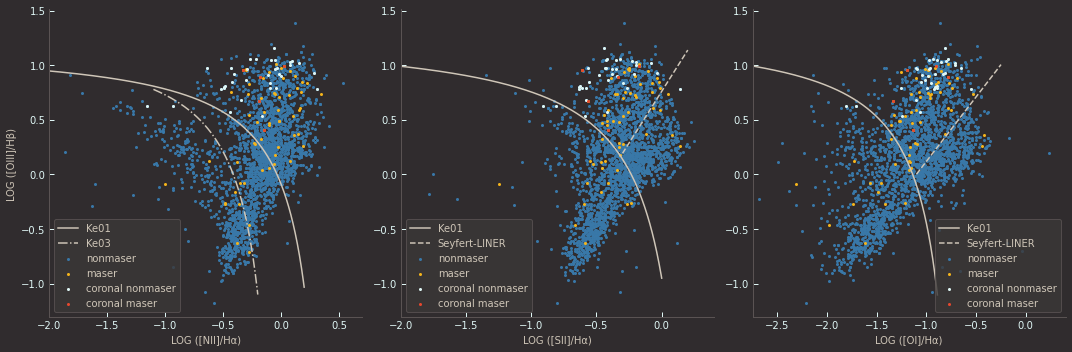

In [97]:

def set_up_style(ax):
    fig = ax.figure
    fig.patch.set_facecolor('#302c2e')  # Set background color to blackish

    ax.set_facecolor('#302c2e')  # Set background color to blackish
    for pos in ['bottom', 'top', 'left', 'right']:
        ax.spines[pos].set_color('#5a5353')  # Set color for plot spines (borders)

    ax.tick_params(axis='x', colors='#dff6f5')  # Set x-axis tick color to whiteish
    ax.tick_params(axis='y', colors='#dff6f5')  # Set y-axis tick color to whiteish

    ax.xaxis.label.set_color('#cfc6b8')  # Set color for x-axis label text
    ax.yaxis.label.set_color('#cfc6b8')  # Set color for y-axis label text
    ax.tick_params(axis='both', which='both', length=5, width=1, direction='in')  # Customize tick marks

    ax.spines['bottom'].set_linewidth(1)  # Set bottom spine thickness
    ax.spines['left'].set_linewidth(1)  # Set left spine thickness
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine

    legend = ax.legend(facecolor='#3b3838', edgecolor='#5a5353')  # Customize legend background and border color
    for text in legend.get_texts():
        text.set_color('#cfc6b8')  # Set legend text color

    legend.get_frame().set_facecolor('#3b3838')  # Set legend background color
    legend.get_frame().set_edgecolor('#5a5353')  # Set legend border color



# Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Extract data columns as NumPy arrays
x_columns = ["N2Ha", "S2Ha", "O1Ha"]
x_col_labels = ["LOG ([NII]/Hα)","LOG ([SII]/Hα)","LOG ([OI]/Hα)"]
y_data = all_df["O3Hb"].values
is_maser = all_df["is_maser"].values
maser_lum = all_df["maser_lum"].values
maser_morphology = all_df["maser_morphology"].values
coronal = all_df["has_coronal_lines"].values

# Create a scatter plot with a star shape marker
star_marker = plt.Line2D([0.5, 1, 1.5, 0.75, 1.25, 0.5, 1, 1.5, 0.75, 1.25],
                         [1, 0.75, 1, 0.5, 0.5, 0.25, 0.25, 0.5, 0.75, 0.75],
                         color='red', marker='*', linestyle='', markersize=10)

# Plotting the data
for i, ax in enumerate(axes):
    x_data = all_df[x_columns[i]].values

    # Mask for maser and non-maser points

    maser_mask = is_maser == 1
    non_maser_mask = is_maser == 0
    megamaser_mask = maser_lum >= 10
    disk_mask = maser_morphology >= 3
    coronal_and_maser_mask = np.logical_and(coronal == 1 , is_maser == 1)
    coronal_and_nonmaser_mask = np.logical_and(coronal == 1 , is_maser == 0)


    
    # Plotting non-maser points
    ax.scatter(x_data[non_maser_mask], y_data[non_maser_mask], color="#3978a8",s=4,label ="nonmaser")

    # Plotting maser points
    ax.scatter(x_data[maser_mask], y_data[maser_mask], color="#f4b41b",s=4,label="maser")
    # Overplot megamasers
    # ax.scatter(x_data[megamaser_mask], y_data[megamaser_mask], color="#e6482e",s=40,marker='o',label="MegaMaser",facecolors='none',linewidths=.75)
    # Overplot disks
    # ax.scatter(x_data[disk_mask], y_data[disk_mask], color="#e6482e",s=100,marker="*",label="Disk Maser",facecolors='none')
    
    #overplot has_coronal
    ax.scatter(x_data[coronal_and_nonmaser_mask], y_data[coronal_and_nonmaser_mask], color="#dff6f5",s=4,label="coronal nonmaser")
    ax.scatter(x_data[coronal_and_maser_mask], y_data[coronal_and_maser_mask], color="#e6482e",s=4,label="coronal maser")



    if i == 0:
        xvals=np.linspace(-3.5,0.2,1000)
        yvals=(0.6/(xvals-0.47))+1.19
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")

        xvals=np.linspace(-1.1,-.2,1000)
        yvals=(0.6/(xvals-0.05))+1.3
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke03",linestyle='-.')
        ax.set_xlabel(x_columns[i])

        ax.set_xlim(-2, 0.7)  # Set the desired x-range
        ax.set_ylabel("LOG ([OIII]/Hβ)",color='#cfc6b8')

    if i == 1:
        xvals=np.linspace(-3.5,0.0,1000)
        yvals=(0.72/(xvals-0.32))+1.30
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")
        xvals=np.linspace(-.30,0.2,1000)
        yvals=(1.89*xvals)+0.76
        ax.plot(xvals,yvals,color="#cfc6b8",label="Seyfert-LINER", linestyle='--')
        ax.set_xlim(-2, 0.4)  # Set the desired x-range

    
    if i == 2:

        #0.73/[log([O I]/Hα) + 0.59] + 1.33 < log([O III]/Hβ)

        xvals=np.linspace(-3.5,-.89,1000)
        yvals=(0.73/(xvals+0.59))+1.33
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")
        xvals=np.linspace(-1.1,-.25,1000)
        yvals=(1.18*xvals)+1.3
        ax.plot(xvals,yvals,color="#cfc6b8",label="Seyfert-LINER", linestyle='--')
        ax.set_xlim(-2.75, 0.4)  # Set the desired x-range

    ax.set_xlabel(x_col_labels[i],color='#cfc6b8')
    legend = ax.legend()
    set_up_style(ax)


plt.tight_layout()
plt.show()



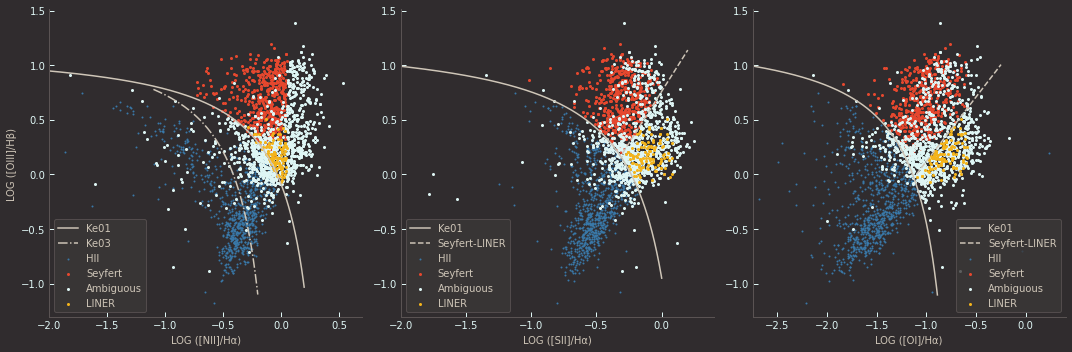

In [103]:
def set_up_style(ax):
    fig = ax.figure
    fig.patch.set_facecolor('#302c2e')  # Set background color to blackish

    ax.set_facecolor('#302c2e')  # Set background color to blackish
    for pos in ['bottom', 'top', 'left', 'right']:
        ax.spines[pos].set_color('#5a5353')  # Set color for plot spines (borders)

    ax.tick_params(axis='x', colors='#dff6f5')  # Set x-axis tick color to whiteish
    ax.tick_params(axis='y', colors='#dff6f5')  # Set y-axis tick color to whiteish

    ax.xaxis.label.set_color('#cfc6b8')  # Set color for x-axis label text
    ax.yaxis.label.set_color('#cfc6b8')  # Set color for y-axis label text

    ax.tick_params(axis='both', which='both', length=5, width=1, direction='in')  # Customize tick marks

    ax.spines['bottom'].set_linewidth(1)  # Set bottom spine thickness
    ax.spines['left'].set_linewidth(1)  # Set left spine thickness
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine

    legend = ax.legend(facecolor='#3b3838', edgecolor='#5a5353')  # Customize legend background and border color
    for text in legend.get_texts():
        text.set_color('#cfc6b8')  # Set legend text color

    legend.get_frame().set_facecolor('#3b3838')  # Set legend background color
    legend.get_frame().set_edgecolor('#5a5353')  # Set legend border color



# Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Extract data columns as NumPy arrays
x_columns = ["N2Ha", "S2Ha", "O1Ha"]
x_col_labels = ["LOG ([NII]/Hα)","LOG ([SII]/Hα)","LOG ([OI]/Hα)"]
y_data = all_df["O3Hb"].values
is_maser = all_df["is_maser"].values
maser_lum = all_df["maser_lum"].values
maser_morphology = all_df["maser_morphology"].values
classification = all_df["Optical_class"].values

# Create a scatter plot with a star shape marker
star_marker = plt.Line2D([0.5, 1, 1.5, 0.75, 1.25, 0.5, 1, 1.5, 0.75, 1.25],
                         [1, 0.75, 1, 0.5, 0.5, 0.25, 0.25, 0.5, 0.75, 0.75],
                         color='red', marker='*', linestyle='', markersize=10)

# Plotting the data
for i, ax in enumerate(axes):
    x_data = all_df[x_columns[i]].values

    # Mask for maser and non-maser points
    amb_mask = classification == "Ambiguous"
    seyfert_mask = classification == "Seyfert"
    LINER_mask = classification == "LINER"
    HII_mask = classification == "HII"
    maser_mask = is_maser == 1
    non_maser_mask = is_maser == 0
    

    
    # Plotting HII
    ax.scatter(x_data[HII_mask], y_data[HII_mask], color="#3978a8",s=1,label ="HII")
    # seyfert
    ax.scatter(x_data[seyfert_mask], y_data[seyfert_mask], color="#e6482e",s=4,label="Seyfert")
    # ambiguous
    ax.scatter(x_data[amb_mask], y_data[amb_mask], color="#dff6f5",s=4,label="Ambiguous")
    # Plotting LINER
    ax.scatter(x_data[LINER_mask], y_data[LINER_mask], color="#f4b41b",s=4,label="LINER")

    if i == 0:
        xvals=np.linspace(-3.5,0.2,1000)
        yvals=(0.6/(xvals-0.47))+1.19
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")

        xvals=np.linspace(-1.1,-.2,1000)
        yvals=(0.6/(xvals-0.05))+1.3
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke03",linestyle='-.')
        ax.set_xlabel(x_columns[i])

        ax.set_xlim(-2, 0.7)  # Set the desired x-range
        ax.set_ylabel("LOG ([OIII]/Hβ)",color='#cfc6b8')

    if i == 1:
        xvals=np.linspace(-3.5,0.0,1000)
        yvals=(0.72/(xvals-0.32))+1.30
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")
        xvals=np.linspace(-.30,0.2,1000)
        yvals=(1.89*xvals)+0.76
        ax.plot(xvals,yvals,color="#cfc6b8",label="Seyfert-LINER", linestyle='--')
        ax.set_xlim(-2, 0.4)  # Set the desired x-range

    
    if i == 2:

        #0.73/[log([O I]/Hα) + 0.59] + 1.33 < log([O III]/Hβ)

        xvals=np.linspace(-3.5,-.89,1000)
        yvals=(0.73/(xvals+0.59))+1.33
        ax.plot(xvals,yvals,color="#cfc6b8",label="Ke01")
        xvals=np.linspace(-1.1,-.25,1000)
        yvals=(1.18*xvals)+1.3
        ax.plot(xvals,yvals,color="#cfc6b8",label="Seyfert-LINER", linestyle='--')
        ax.set_xlim(-2.75, 0.4)  # Set the desired x-range

    ax.set_xlabel(x_col_labels[i],color='#cfc6b8')
    legend = ax.legend()
    set_up_style(ax)


plt.tight_layout()
plt.show()

